In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Filter for digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # Only two classes now
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, verbose=1)  # Train for more epochs as needed

# Function to extract and plot activations
def get_activations(model, model_inputs, layer_name=None):
    layer_outputs = [layer.output for layer in model.layers if not layer_name or layer.name == layer_name]  # Get outputs of all or specific layers
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)  # Create a model that will return these outputs
    activations = activation_model.predict(model_inputs)
    return activations

# Function to plot the activations
def plot_activations(activations):
    fig, axes = plt.subplots(nrows=1, ncols=len(activations), figsize=(20, 3))
    for idx, activation in enumerate(activations):
        ax = axes[idx]
        if len(activation.shape) == 2:  # Dense layer
            ax.matshow(activation, cmap='viridis')
        else:
            ax.imshow(activation[0, :, :, 0] if len(activation.shape) == 4 else activation[0], cmap='viridis')
        ax.axis('off')
    plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9834 - loss: 0.0466
Epoch 2/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 3/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 0.0012
Epoch 4/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0016
Epoch 5/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.6304e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


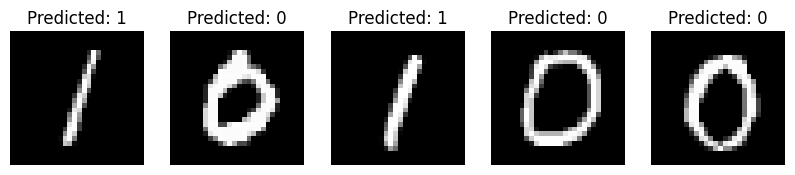

In [ ]:

# Select some test images to visualize
num_images = 5
test_images = x_test[:num_images]
predictions = model.predict(test_images)

# Plot test images with predictions
fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(test_images[i], cmap='gray')
    ax.title.set_text(f"Predicted: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


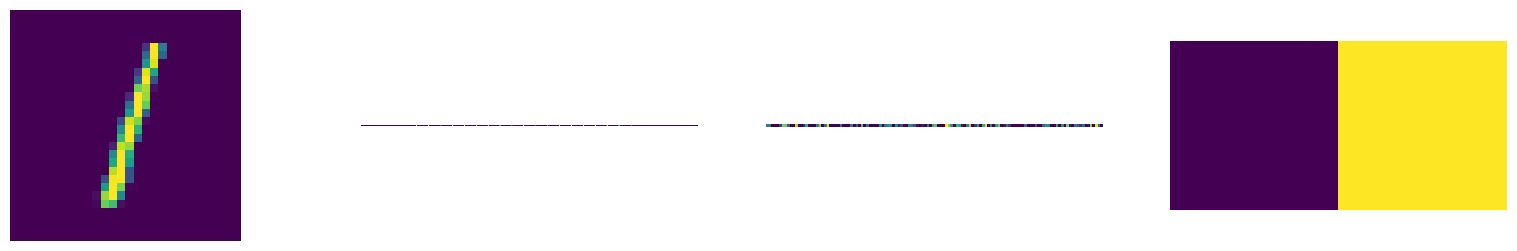

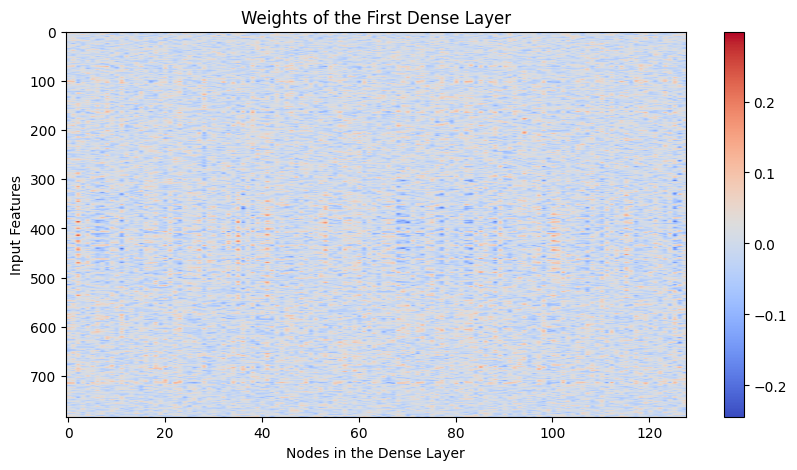

In [ ]:

# Visualize activations for the first test image
activations = get_activations(model, test_images[:1])
plot_activations(activations)

# Visualize weights of the first dense layer
weights = model.layers[2].get_weights()[0]  # Weights of the first dense layer
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(weights, cmap='coolwarm', aspect='auto')
ax.title.set_text('Weights of the First Dense Layer')
plt.xlabel('Nodes in the Dense Layer')
plt.ylabel('Input Features')
plt.colorbar(ax.imshow(weights, cmap='coolwarm', aspect='auto'), ax=ax)
plt.show()

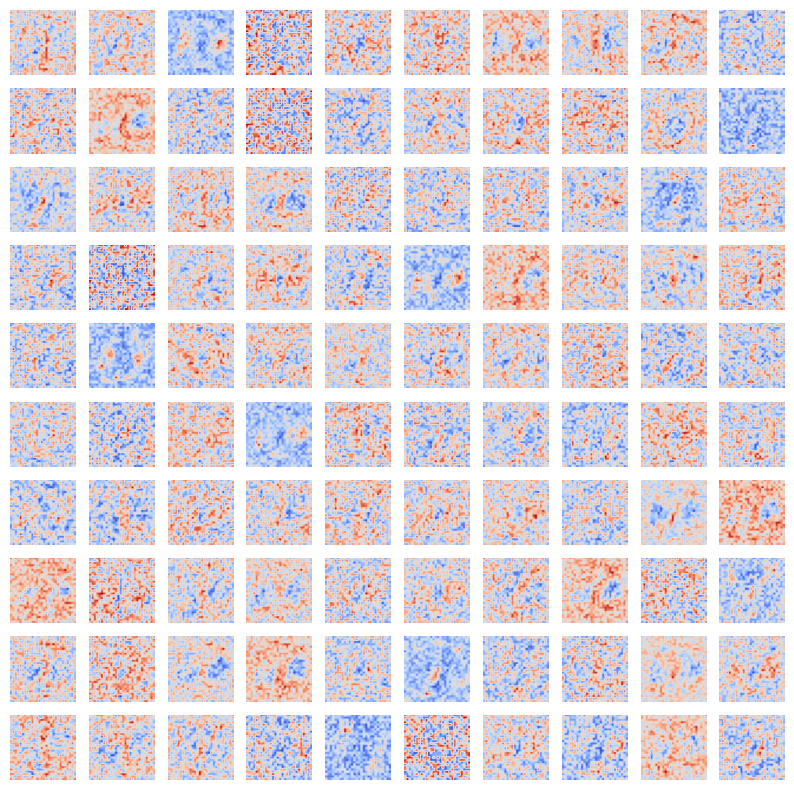

In [ ]:
def plot_weights(layer_index):
    weights = model.layers[layer_index].get_weights()[0]  # Use the function parameter
    num_plots = min(weights.shape[1], 100)  # Ensure no more than 100 plots
    num_cols = int(np.sqrt(num_plots))  # Determine the size of the grid
    num_rows = int(np.ceil(num_plots / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[1]:
            img = weights[:, i].reshape(28, 28)  # Reshape assumes the weight size allows for this
            ax.imshow(img, cmap='coolwarm')
            ax.axis('off')
    plt.show()

# Example usage
plot_weights(2)  # Visualize weights of the third layer, if appropriate


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def plot_all_layer_weights(model):
    for layer_index, layer in enumerate(model.layers):
        weights = layer.get_weights()
        if len(weights) > 0:
            weight_matrix = weights[0]
            num_rows = weight_matrix.shape[0]
            num_cols = weight_matrix.shape[1]

            # Calculate subplot dimensions
            subplot_rows = int(np.sqrt(num_cols))  # Number of subplot rows
            subplot_cols = int(np.ceil(num_cols / subplot_rows))  # Number of subplot columns
            subplot_cols = min(subplot_cols, 10)  # Limit columns to a reasonable number for visibility

            fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_cols * 1.5, subplot_rows * 1.5))
            fig.suptitle(f"Layer {layer_index + 1} ({layer.name}) Weights", fontsize=16)

            for i, ax in enumerate(axes.flat):
                if i < num_cols:  # Ensure that we do not go out of bounds
                    if num_rows == 784:
                        img = weight_matrix[:, i].reshape(28, 28)
                        ax.imshow(img, cmap='coolwarm')
                    else:
                        # Display as a vertical heatmap for non-28x28 reshaped weights
                        img = weight_matrix[:, i].reshape(-1, 1)
                        ax.matshow(img, cmap='coolwarm', aspect='auto')
                    ax.axis('off')
                else:
                    ax.axis('off')
            plt.tight_layout()
            plt.show()



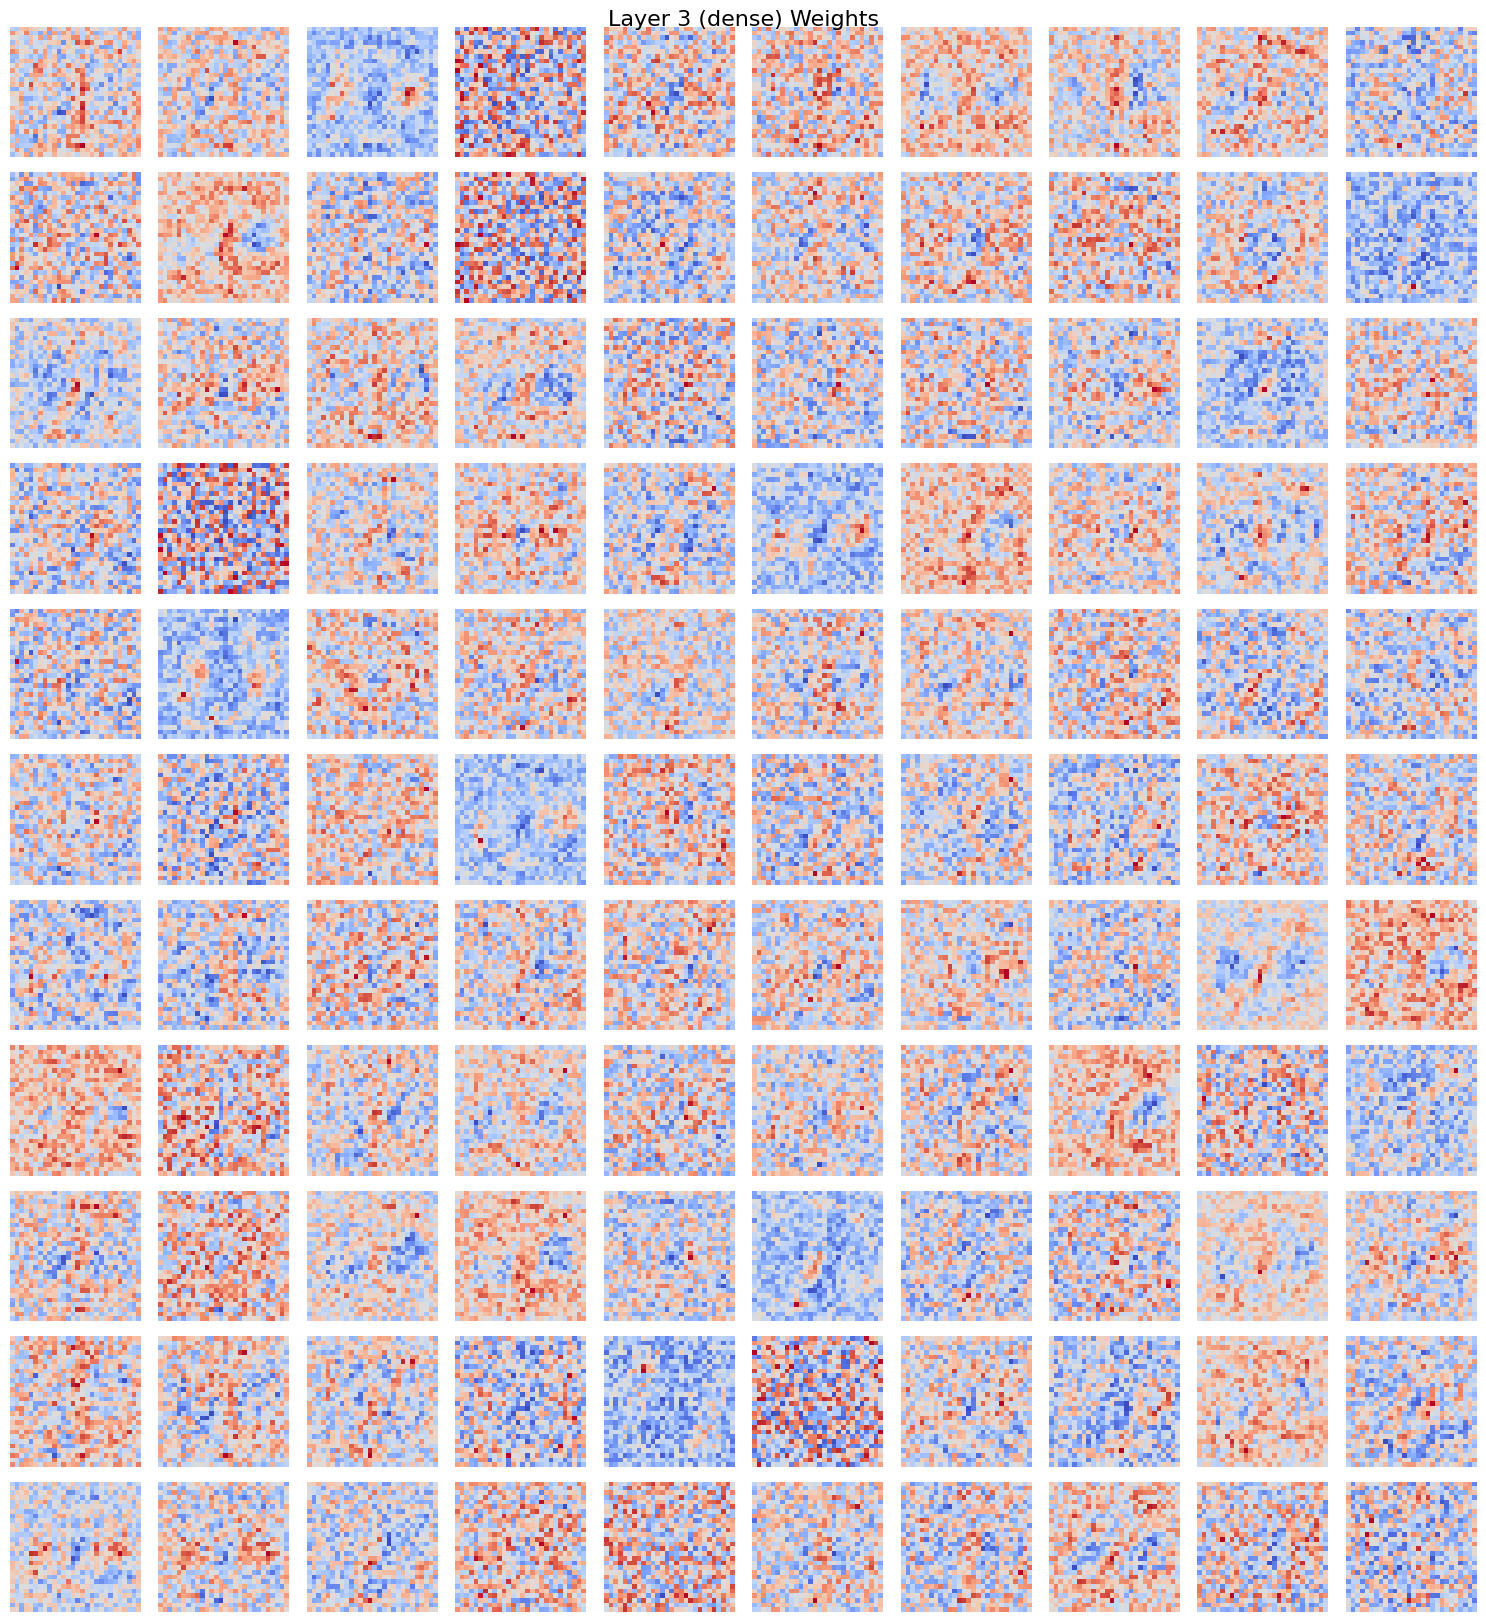

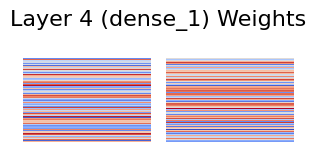

In [ ]:
plot_all_layer_weights(model)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def get_activations(model, model_inputs):
    # This model outputs the activations from all layers
    layer_outputs = [layer.output for layer in model.layers if not layer.name.startswith('flatten')]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(model_inputs)
    return activations

def plot_activations(model, input_image):
    activations = get_activations(model, input_image)

    for layer_index, layer_activation in enumerate(activations):
        layer = model.layers[layer_index]
        print(f"Layer {layer_index + 1} ({layer.name}) activations:")

        # Check if the activation is from a dense layer (2D)
        if len(layer_activation.shape) == 2:
            # Plot as a heatmap
            plt.figure(figsize=(10, 1.5))
            plt.matshow(layer_activation, cmap='viridis', fignum=1)
            plt.colorbar()
            plt.title(f"Dense layer activations: {layer.name}")
            plt.xlabel("Features")
            plt.ylabel("Batch")
            plt.show()

        # Check if the activation is from a convolutional layer (4D)
        elif len(layer_activation.shape) == 4:
            num_features = layer_activation.shape[-1]  # Number of features in the feature map
            size = layer_activation.shape[1]  # The dimension of each feature map
            num_cols = 16
            num_rows = num_features // num_cols

            display_grid = np.zeros((size * num_rows, size * num_cols))

            for col in range(num_cols):
                for row in range(num_rows):
                    if col * num_cols + row < num_features:
                        channel_image = layer_activation[0, :, :, col * num_cols + row]
                        channel_image -= channel_image.mean()  # Normalize
                        channel_image /= channel_image.std()  # Normalize
                        channel_image *= 64  # Scale
                        channel_image += 128  # Shift
                        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                        display_grid[row * size: (row + 1) * size,
                                     col * size: (col + 1) * size] = channel_image

            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title(f"Conv layer activations: {layer.name}")
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Layer 1 (input_layer) activations:
Layer 2 (flatten) activations:


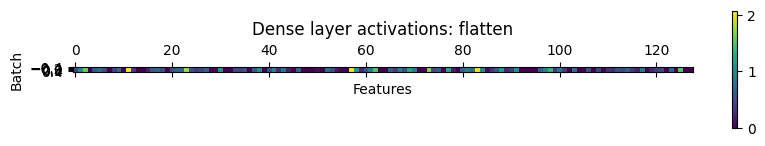

Layer 3 (dense) activations:


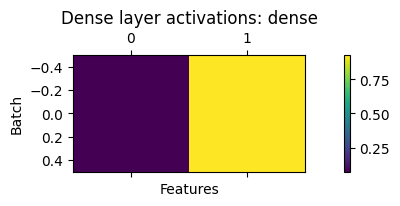

In [ ]:
# Load model and prepare data
# model = tf.keras.models.load_model(model)  # Load your pre-trained model
(input_image, _), _ = tf.keras.datasets.mnist.load_data()
input_image = input_image[0:1, :, :] / 255.0  # Normalize and add batch dimension
input_image = input_image[..., np.newaxis]  # Add color channel dimension if needed

# Plot activations for the input image
plot_activations(model, input_image)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,216 (1.15 MB)

 Trainable params: 100,738 (393.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,478 (787.03 KB)